In [1]:
import pandas as pd

df = pd.read_csv('exams.csv')

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
df.loc[df['gender']=='male','gender'] = 0
df.loc[df['gender']=='female','gender'] = 1
df['gender']=df['gender'].astype(int)

df.loc[df['lunch']=='standard','lunch'] = 0
df.loc[df['lunch']=='free/reduced','lunch'] = 1
df['lunch']=df['lunch'].astype(int)

df.loc[df['test preparation course']=='completed','test preparation course'] = 0
df.loc[df['test preparation course']=='none','test preparation course'] = 1
df['test preparation course']=df['test preparation course'].astype(int)

In [4]:
df = pd.get_dummies(df)

In [5]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,0,0,67,67,63,1,0,0,0,0,0,0,1,0,0,0
1,1,1,1,40,59,55,0,0,0,1,0,0,0,0,0,0,1
2,0,1,1,59,60,50,0,0,0,0,1,0,0,0,0,1,0
3,0,0,1,77,78,68,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,78,73,68,0,0,0,0,1,1,0,0,0,0,0


In [6]:
feature = df[df.keys().drop(['math score','reading score','writing score'])]
outcome = df[['math score','reading score','writing score']].values

In [7]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_target, test_target = train_test_split(feature,outcome,random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(train_feature, train_target)

RandomForestRegressor()

In [9]:
y_pred = reg.predict(test_feature)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
array_str = ["Math","Reading","Writing"]

for i in range(y_pred.shape[1]):
    print(array_str[i],"score","MAE :",mean_absolute_error(test_target[:,i], y_pred[:,i]))
    print(array_str[i],"score","RMSE :",np.sqrt(mean_squared_error(test_target[:,i], y_pred[:,i])))

Math score MAE : 11.06889505693369
Math score RMSE : 13.904876606610129
Reading score MAE : 11.621947823974773
Reading score RMSE : 14.324632037718754
Writing score MAE : 11.311912584340968
Writing score RMSE : 13.909463714441372


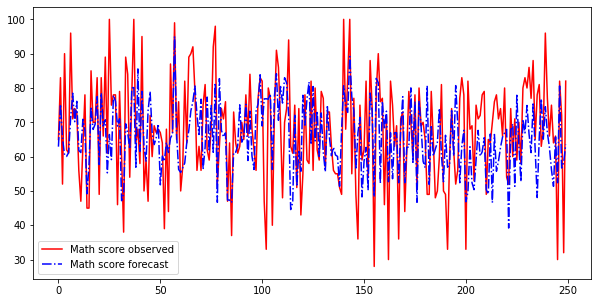

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test_target[:,0],linestyle='-',color='red',label='Math score observed')
plt.plot(y_pred[:,0],linestyle='-.',color='blue',label='Math score forecast')
plt.legend()
plt.show()

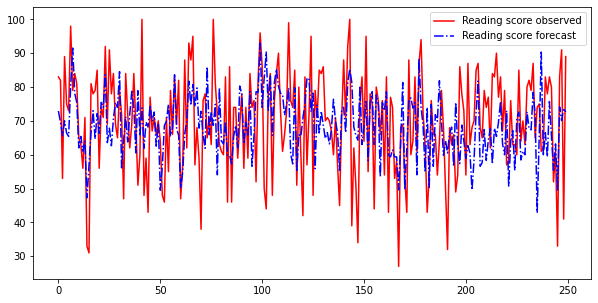

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test_target[:,1],linestyle='-',color='red',label='Reading score observed')
plt.plot(y_pred[:,1],linestyle='-.',color='blue',label='Reading score forecast')
plt.legend()
plt.show()

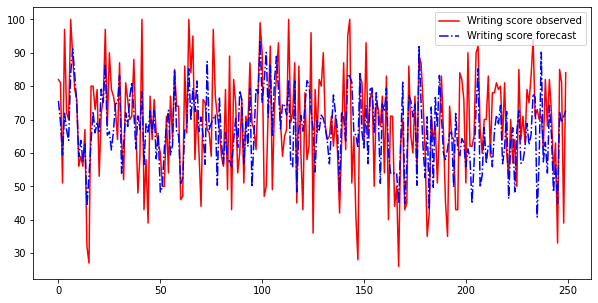

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test_target[:,2],linestyle='-',color='red',label='Writing score observed')
plt.plot(y_pred[:,2],linestyle='-.',color='blue',label='Writing score forecast')
plt.legend()
plt.show()

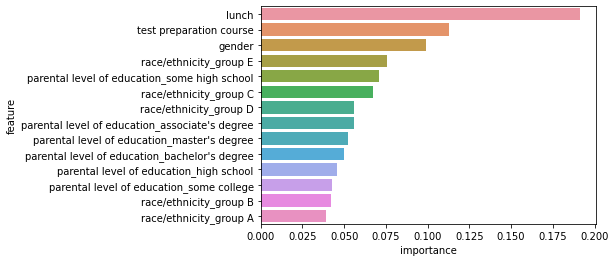

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.DataFrame()
importances['feature']=reg.feature_names_in_
importances['importance']=reg.feature_importances_
importances.sort_values('importance', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
sns.barplot(x='importance',y='feature', data=importances)
plt.show()